In [65]:
!pip install yfinance

In [66]:
import yfinance as yf
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta


In [67]:
today = datetime.today().strftime('%Y-%m-%d')

# Step 1: Download gold price data (monthly)
gold = yf.download("GC=F", start="2010-01-01", end=today, interval="1mo", auto_adjust=True)

# Step 2: Keep only the 'Close' column and drop missing values
gold = gold[["Close"]].dropna().rename(columns={"Close": "Gold_Price"})

# Step 3: Normalize the price using MinMaxScaler (between 0 and 1)
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(gold)

# Step 4: Create sequences for the LSTM
def create_sequences(data, sequence_length=12):
    X, y = [], []
    for i in range(sequence_length, len(data)):
        X.append(data[i-sequence_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

sequence_length = 12
X, y = create_sequences(scaled_prices, sequence_length)

# Step 5: Reshape X to fit LSTM input: (samples, time_steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split the data
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


[*********************100%***********************]  1 of 1 completed


In [68]:
model = Sequential([
    LSTM(50, return_sequences=True, activation='tanh', input_shape=(sequence_length, 1)),
    Dropout(0.2),
    LSTM(50, activation='tanh'),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                   │ (None, 12, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
history = model.fit(X, y, epochs=100, batch_size=16, verbose=1)


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.0581
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0227
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0135
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0078
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0058
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0106
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0068
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0080
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0070
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0058
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0052
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0055
Epoch 13/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0070
Epoch 14/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0049
Epoch 15/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - lo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


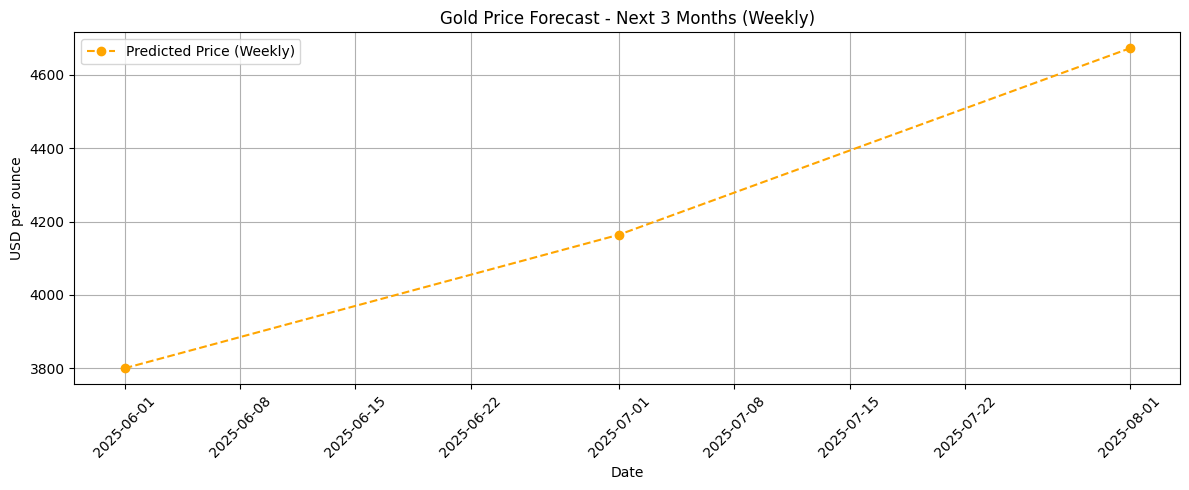

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


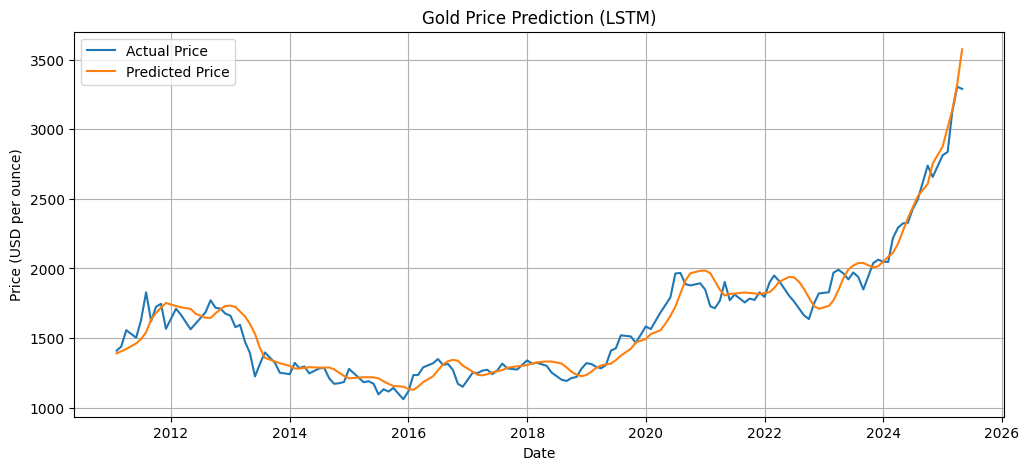

In [73]:
# Predict next 3 months using sliding window
future_steps = 3
last_sequence = scaled_prices[-sequence_length:]  # last 12 months
future_predictions = []

for _ in range(future_steps):
    input_seq = last_sequence.reshape((1, sequence_length, 1))
    next_pred = model.predict(input_seq)[0][0]
    future_predictions.append(next_pred)

    # slide window: remove oldest, append new prediction
    last_sequence = np.append(last_sequence[1:], [[next_pred]], axis=0)

# Inverse transform predictions back to price
future_prices = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Create future dates
last_date = gold.index[-1]
future_dates = pd.date_range(last_date + pd.DateOffset(months=1), periods=future_steps, freq='MS')

# Plot only future weekly predictions for the next 3 months
plt.figure(figsize=(12, 5))
plt.plot(future_dates, future_prices, label="Predicted Price (Weekly)", linestyle='--', marker='o', color='orange')
plt.title("Gold Price Forecast - Next 3 Months (Weekly)")
plt.xlabel("Date")
plt.ylabel("USD per ounce")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
# Use the trained LSTM model to predict
predictions = model.predict(X)

# Inverse scale the predictions and true values
predicted_prices = scaler.inverse_transform(predictions)
actual_prices = scaler.inverse_transform(y.reshape(-1, 1))
plt.figure(figsize=(12, 5))
plt.plot(gold.index[sequence_length:], actual_prices, label='Actual Price')
plt.plot(gold.index[sequence_length:], predicted_prices, label='Predicted Price')
plt.title('Gold Price Prediction (LSTM)')
plt.xlabel('Date')
plt.ylabel('Price (USD per ounce)')
plt.legend()
plt.grid(True)
plt.show()
